In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from nltk.corpus import stopwords
import spacy
import pandas as pd
from wordcloud import WordCloud


In [2]:
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv("D:\\Ds\projects\\excelR nlp\\extracted_files.csv")

In [4]:
df

,Unnamed: 0,email,name,content,label,skills
0,0,NaN,Anubhav Kumar Singh,Anubhav Kumar Singh\t\t\r\r To work in a gl...,Peoplesoft Resume,"['Electrical', 'Unix', 'Writing', 'Installatio..."
1,1,NaN,G. Ananda,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ..."
2,2,NaN,PeopleSoft Database Administrator,PeopleSoft Database Administrator\r ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Tes..."
3,3,NaN,Classification: Internal,Murali\r\rExperience Summary \r\rI have 6 year...,Peoplesoft Resume,"['Debugging', 'Unix', 'Installation', 'C', 'Sy..."
4,4,NaN,Priyanka Ramadoss,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Banking', ..."
5,5,NaN,SIRAZUDDIN M,\r\r\r\r\r\r\r\r\r\r\r\r\r\rPROFILE SUMMARY\r\...,Peoplesoft Resume,"['Unix', 'Cloud', 'Sdlc', 'Solaris', 'Finance'..."
6,6,NaN,PEOPLESOFT Administrator,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ..."
7,7,NaN,PeopleSoft Admin VARKALA VIKAS,PeopleSoft Admin\rVARKALA VIKAS\r\rCareer Obj...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi..."
8,8,NaN,Vinod Akkala,Vinod Akkala ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Aud..."
9,9,NaN,PeopleSoft Admin,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi..."


In [5]:
df = df.drop(columns = ["Unnamed: 0", 'email'])

Deleted Unnamed: 0 and email columns as these columns had no use case

In [6]:
import regex as re

In [7]:
def clean_text(text):
    if text.startswith("b'"):                 
        text = text[2:]
    cleaned_text = re.sub(r'[\n\t]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.replace('\x07', '').strip()
    cleaned_text = re.sub(r'(\\n|\\t|\\x07|\\\\)', ' ', cleaned_text)
    cleaned_text = re.sub(r'\'b\'|\'"', '', cleaned_text)
    cleaned_text = re.sub(r'(\\x[0-9a-fA-F]{2}|\\xc7\\x81|\\xe2\\x80\\x99)', '', cleaned_text)
    cleaned_text = re.sub(r'[\uf0b7/]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = cleaned_text.strip()
    

    return cleaned_text


In [8]:
clean_column = df["content"].astype(str).apply(lambda x: clean_text(x))

In [9]:
df["clean column"] = clean_column

In [10]:
df

,name,content,label,skills,clean column
0,Anubhav Kumar Singh,Anubhav Kumar Singh\t\t\r\r To work in a gl...,Peoplesoft Resume,"['Electrical', 'Unix', 'Writing', 'Installatio...",anubhav kumar singh to work in a globally comp...
1,G. Ananda,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ...",profile summary: 7+ years of experience in imp...
2,PeopleSoft Database Administrator,PeopleSoft Database Administrator\r ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Tes...",peoplesoft database administrator gangareddy p...
3,Classification: Internal,Murali\r\rExperience Summary \r\rI have 6 year...,Peoplesoft Resume,"['Debugging', 'Unix', 'Installation', 'C', 'Sy...",murali experience summary i have 6 years of ex...
4,Priyanka Ramadoss,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Banking', ...","priyanka ramadoss 61 46, mountpleasant, coonoo..."
5,SIRAZUDDIN M,\r\r\r\r\r\r\r\r\r\r\r\r\r\rPROFILE SUMMARY\r\...,Peoplesoft Resume,"['Unix', 'Cloud', 'Sdlc', 'Solaris', 'Finance'...",profile summary i have overall 6.8 years’ expe...
6,PEOPLESOFT Administrator,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ...",peoplesoft administrator srinivas.k experience...
7,PeopleSoft Admin VARKALA VIKAS,PeopleSoft Admin\rVARKALA VIKAS\r\rCareer Obj...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi...",peoplesoft admin varkala vikas career objectiv...
8,Vinod Akkala,Vinod Akkala ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Aud...",vinod akkala peoplesoft dba admin. professiona...
9,PeopleSoft Admin,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi...",peoplesoft admin peoplesoft dba ganesh alladi ...


In [11]:
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize

df['word_count'] = df['clean column'].apply(lambda x: len(word_tokenize(x)))
df['sent_count'] = df['clean column'].apply(lambda x: len(sent_tokenize(x)))

# ANALYSIS

## checking imbalance in dataset

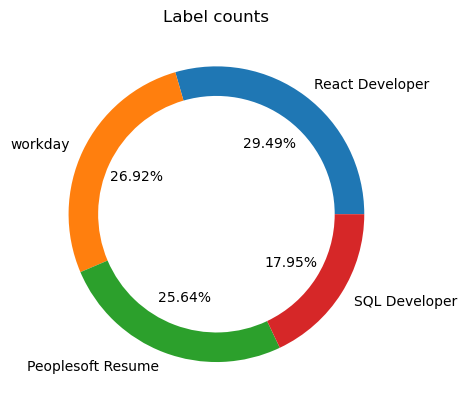

In [12]:
plt.pie(df["label"].value_counts(), autopct= "%.2f%%", labels=df["label"].value_counts().index, wedgeprops={'width':0.2,})
plt.title("Label counts");

There is imbalance no the dataset

## word count plot in each category

<Axes: xlabel='label'>

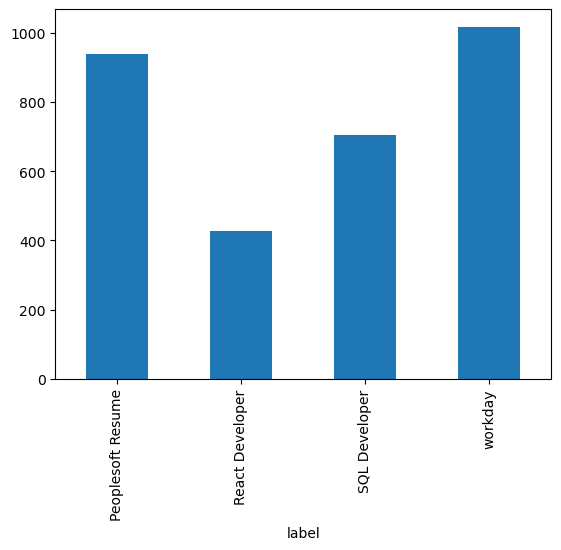

In [13]:
df.groupby("label")["word_count"].median().plot(kind="bar")

workday and people soft resumes has most number of words

## sentence count plot in each category

<Axes: xlabel='label'>

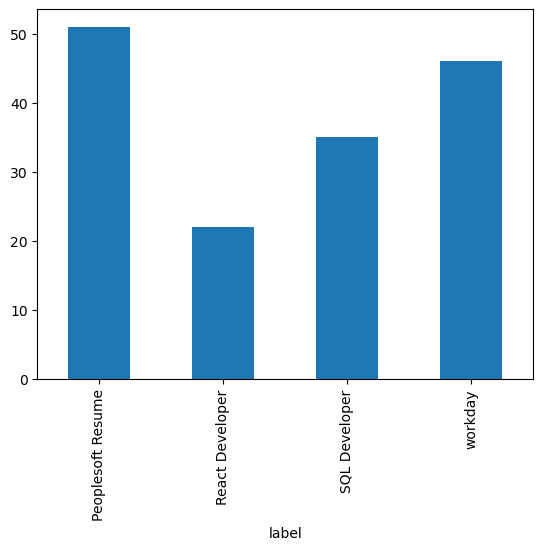

In [14]:
df.groupby("label")["sent_count"].median().plot(kind="bar")

workday and people soft resumes has most number of sentences

## creating experience column

In [15]:
df.describe()

,word_count,sent_count
count,78.000000,78.000000
mean,837.961538,40.807692
std,488.305696,25.507859
min,250.000000,3.000000
25%,496.250000,24.000000
50%,707.500000,34.500000
75%,1059.500000,51.000000
max,2865.000000,168.000000


In [16]:
def extract_experience(text):
    pattern = r'(\d+(\.\d+)?)\+?(?:\s*years?|yrs?|Fresher)'
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return 0

df['exp'] = df['clean column'].apply(lambda x: extract_experience(x))


In [17]:
df["exp"] = df["exp"].astype(float)

<Axes: xlabel='label'>

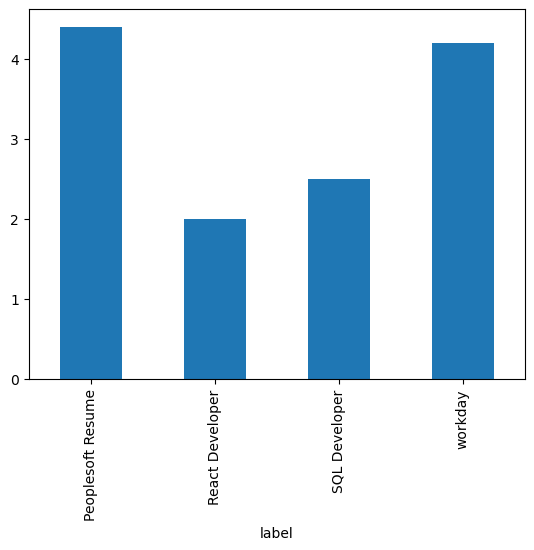

In [18]:
df.groupby("label")["exp"].median().plot(kind="bar")

In [19]:
df

,name,content,label,skills,clean column,word_count,sent_count,exp
0,Anubhav Kumar Singh,Anubhav Kumar Singh\t\t\r\r To work in a gl...,Peoplesoft Resume,"['Electrical', 'Unix', 'Writing', 'Installatio...",anubhav kumar singh to work in a globally comp...,1146,65,0.00
1,G. Ananda,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ...",profile summary: 7+ years of experience in imp...,1185,77,7.00
2,PeopleSoft Database Administrator,PeopleSoft Database Administrator\r ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Tes...",peoplesoft database administrator gangareddy p...,935,44,4.00
3,Classification: Internal,Murali\r\rExperience Summary \r\rI have 6 year...,Peoplesoft Resume,"['Debugging', 'Unix', 'Installation', 'C', 'Sy...",murali experience summary i have 6 years of ex...,713,51,6.00
4,Priyanka Ramadoss,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Banking', ...","priyanka ramadoss 61 46, mountpleasant, coonoo...",731,34,4.11
5,SIRAZUDDIN M,\r\r\r\r\r\r\r\r\r\r\r\r\r\rPROFILE SUMMARY\r\...,Peoplesoft Resume,"['Unix', 'Cloud', 'Sdlc', 'Solaris', 'Finance'...",profile summary i have overall 6.8 years’ expe...,604,27,6.80
6,PEOPLESOFT Administrator,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Testing', ...",peoplesoft administrator srinivas.k experience...,2865,116,10.00
7,PeopleSoft Admin VARKALA VIKAS,PeopleSoft Admin\rVARKALA VIKAS\r\rCareer Obj...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi...",peoplesoft admin varkala vikas career objectiv...,1179,52,4.20
8,Vinod Akkala,Vinod Akkala ...,Peoplesoft Resume,"['Unix', 'Installation', 'System', 'Erp', 'Aud...",vinod akkala peoplesoft dba admin. professiona...,2147,168,7.00
9,PeopleSoft Admin,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft Resume,"['Ux', 'Installation', 'System', 'Erp', 'Testi...",peoplesoft admin peoplesoft dba ganesh alladi ...,1643,78,6.40


peoplesoft Candidates have 4 years of median experience wheres 

react developer has around 2 years of mediaan experience

## creating wordcloud

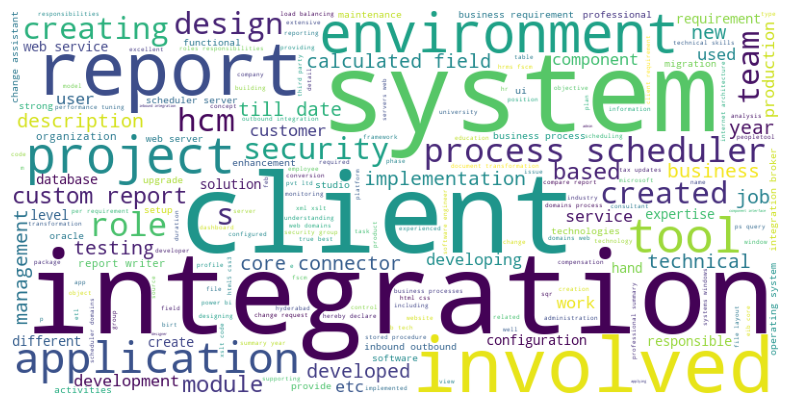

In [20]:

stop_words = set(stopwords.words('english'))

exclude_words = ["sql", "server", "experience", "data", "using", "project", "workday", "worked", 
                 "peoplesoft", "react", "js", "working", "application", "people", "support", 'database', "etc"
                ,"good", "various", "service", "skill", "tool", "skills", "developer", "knowledge"]

exclude_words_lower = set(word.lower() for word in exclude_words)

all_exclude_words = exclude_words_lower.union(stop_words)

text = ' '.join(word.lower() for text in df['clean column'] for word in text.split() if word.lower() not in all_exclude_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


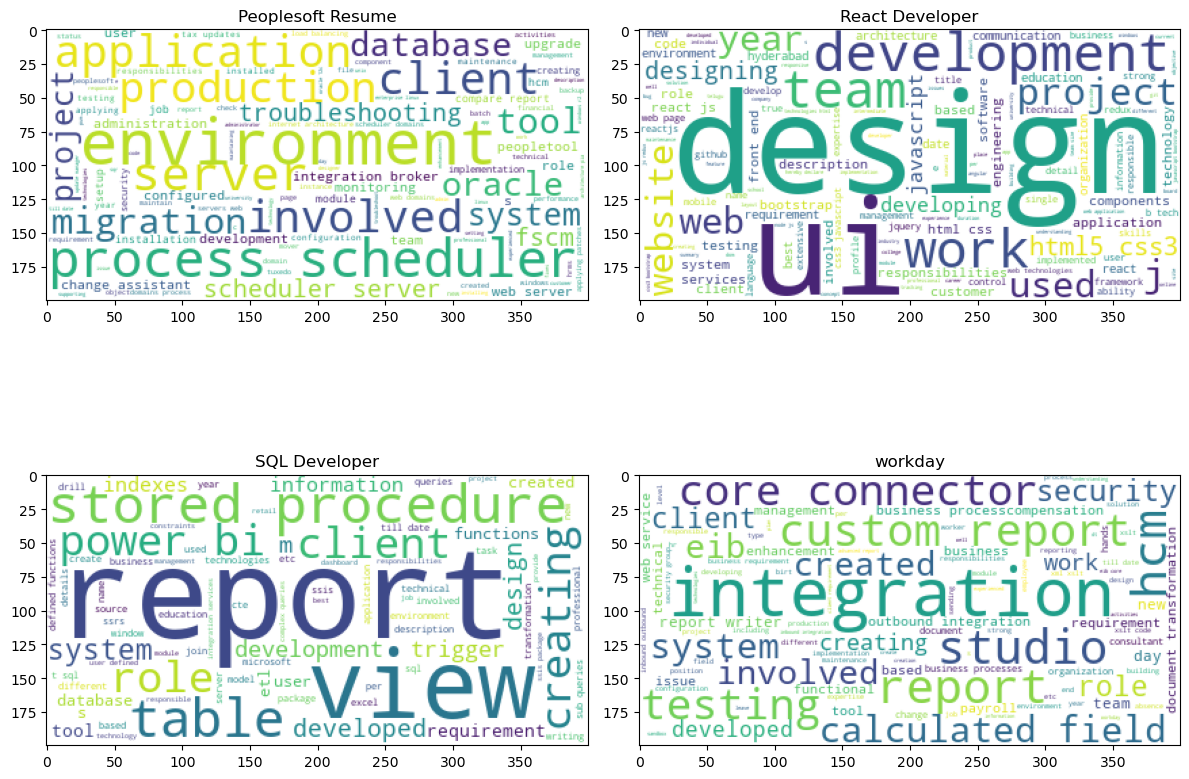

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
unique_labels = df["label"].unique() 
for i, label in enumerate(unique_labels):
    filtered_df = df[df['label'] == label]
    
    text = ' '.join(word.lower() for text in filtered_df['clean column'] for word in text.split() if word.lower() not in exclude_words)
    
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    
    ax = axes[i // 2, i % 2] 
    ax.imshow(wordcloud)
    ax.set_title(label)

plt.tight_layout()
plt.show()

## skills plot for aeach category

In [22]:
df["skills"] = df["skills"].apply(ast.literal_eval)

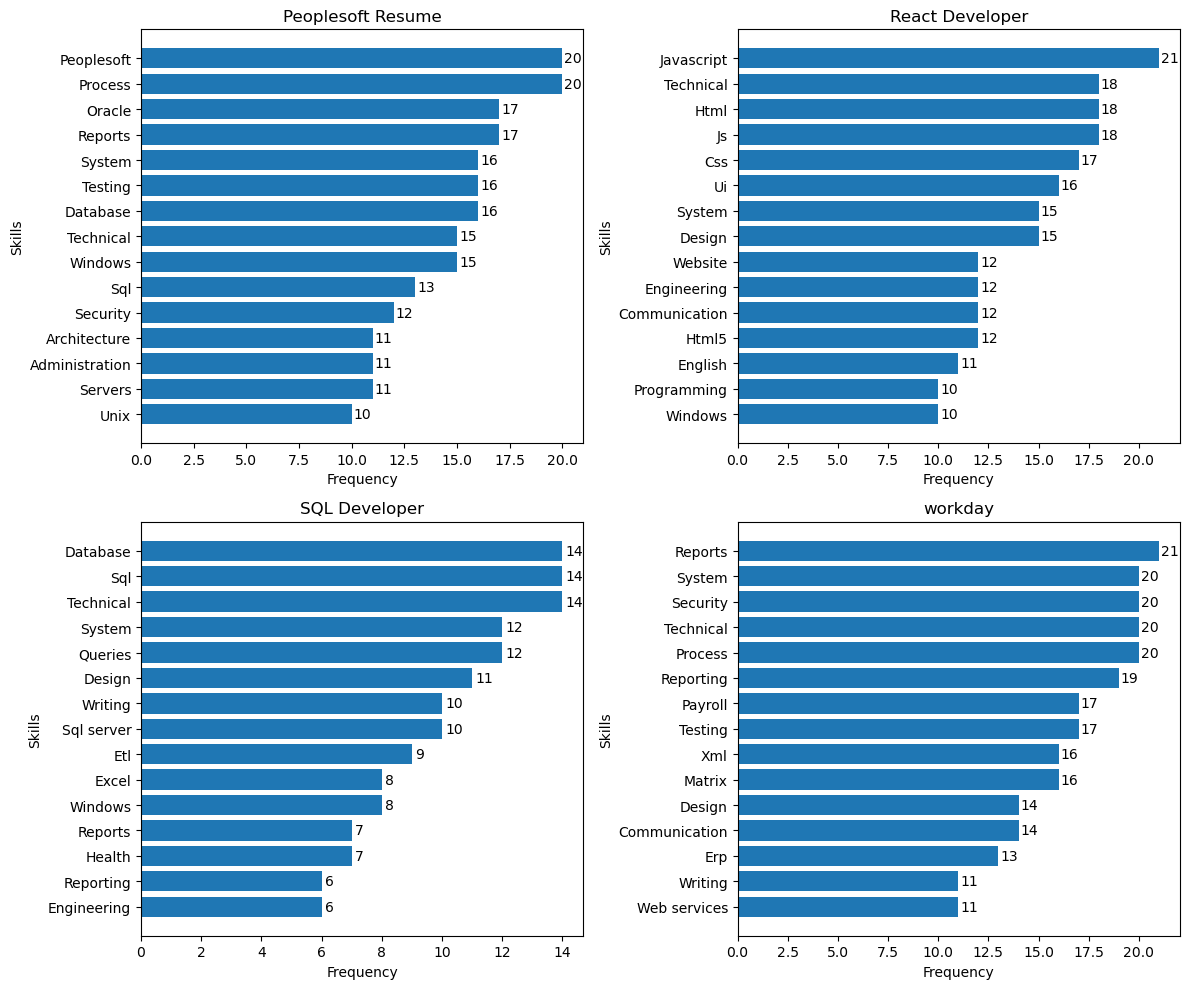

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, label in enumerate(df["label"].unique()):
    all_skills = [skill for sublist in df[df["label"] == label]["skills"] for skill in sublist]
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(15)
    skills, counts = zip(*top_skills)
    
    ax = axes[i // 2, i % 2]
    ax.barh(skills, counts,)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Skills')
    ax.set_title(f'{label}')
    ax.invert_yaxis() 
    
    for j, count in enumerate(counts):
        ax.text(count + 0.1, j, str(count), ha='left', va='center', color='black')


plt.tight_layout()
plt.show()


## language plots for each category

In [24]:
languages = ["english", "telugu", "kannada", "gujarati", "marathi", "hindi", "spanish", "french", 
             "malyalam", "japanese", "tamil", "bengali", "spanish", "sanskrit"]

lang_regex = {lang: re.compile(r'\b{}\b'.format(lang), re.IGNORECASE) for lang in languages}

def detect_languages(text):
    detected_languages = []
    for lang, regex in lang_regex.items():
        if regex.search(text):
            detected_languages.append(lang)
    return detected_languages

df['detected_languages'] = df['content'].apply(detect_languages)

In [25]:
def count_language(detected_languages):
    return len(detected_languages)

df["lang_count"] =  df["detected_languages"].apply(count_language)

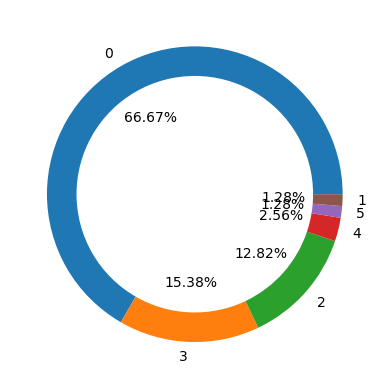

In [26]:
plt.pie(df["lang_count"].value_counts(), autopct="%.2f%%", labels=df["lang_count"].value_counts().index,
       wedgeprops={'width':0.2,});

- Around 66% people have not mentioned any language
- 19% people speak 3 or more languages

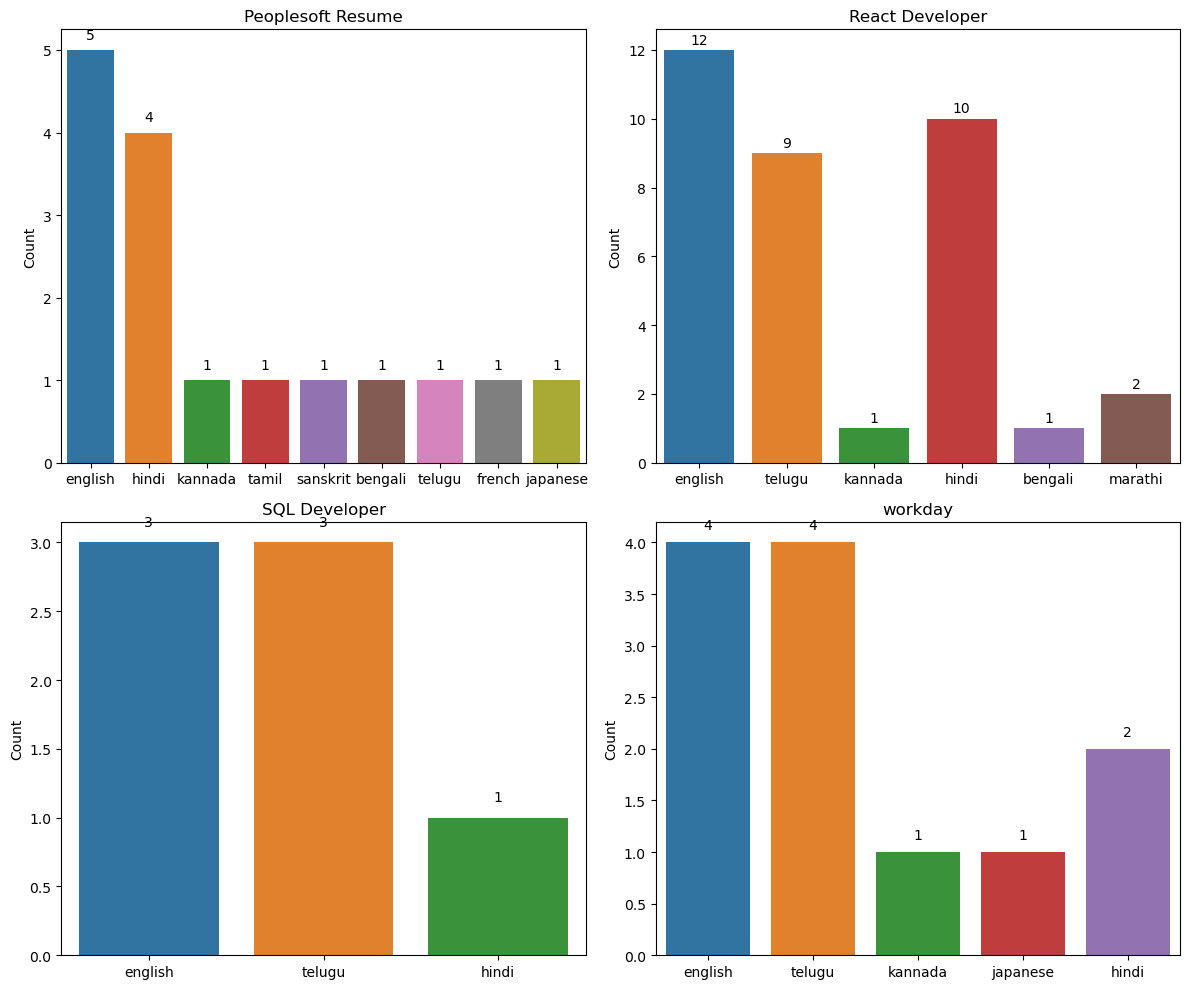

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, label in enumerate(df["label"].unique()):
    row_idx = i // 2
    col_idx = i % 2
    
    label_df = df[df["label"] == label]
    
    detected_languages = [lang for languages_list in label_df["detected_languages"] for lang in languages_list]
    
    language_counts = Counter(detected_languages)
    
    ax = axes[row_idx, col_idx]
    
    sns.barplot(x=list(language_counts.keys()), y=list(language_counts.values()), ax=ax)
    ax.set_title(label)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x') 
    for j, count in enumerate(language_counts.values()):
        ax.text(j, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Apart from english hindi and telgu speaking candidates are more
- most of the people applying belongs to region where regional language teglu is spoken frequently

## educational plot for each category

In [28]:
def extract_education_from_resume(text):
    education = []
    education_keywords = ['Bsc', 'B. Pharmacy', 'B Pharmacy', 'Msc', 'M. Pharmacy', 'Ph.D', 'Bachelor','Bachelors', 
                          'Master', 'Masters' ,"b.sc",
                         "m.sc", "b.ca", "bca", "m.ca", "mca", "ba", "b.a", "engineering", "B.tech", "btech",
                         "mtech", "mtech", "b.e", "m.e", 'diploma', "B.com", 'bcom', "ma"]

    for keyword in education_keywords:
        pattern = r"(?i)\b{}\b".format(re.escape(keyword))
        match = re.search(pattern, text)
        if match:
            education.append(match.group())

    
    return education

df["qualification"] = df["content"].apply(extract_education_from_resume)
df["qualification"].head()

0    [Engineering, B.Tech]
1              [Bachelors]
2                       []
3                       []
4       [Engineering, B.E]
Name: qualification, dtype: object

In [29]:
def standardize_qualification(qualification):
    quals_lower = [i.lower() for i in qualification]
    if any(i in ["msc", "masters", "master", "mca", "mtech", "m.e", "m.ca", "m.tech"] for i in quals_lower):
        return "Masters"
    
    elif any(i in ["bsc", "bachelors", "bachelor", "bca", "btech", "b.e", "b.ca", "b.tech",
                     "b.sc", "bsc", "engineering"] for i in quals_lower):
        return "Bachelors"
    
    else:
        return "Not Mentioned"


In [30]:
df['qualification'] = df['qualification'].apply(standardize_qualification)

In [31]:
df['qualification'].head()

0        Bachelors
1        Bachelors
2    Not Mentioned
3    Not Mentioned
4        Bachelors
Name: qualification, dtype: object

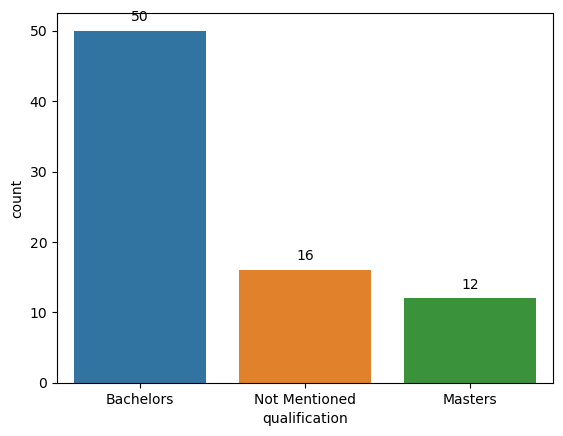

In [32]:
ax = sns.countplot(x=df["qualification"])

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.0f'), 
                (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

most candidates have only bachelors degree 

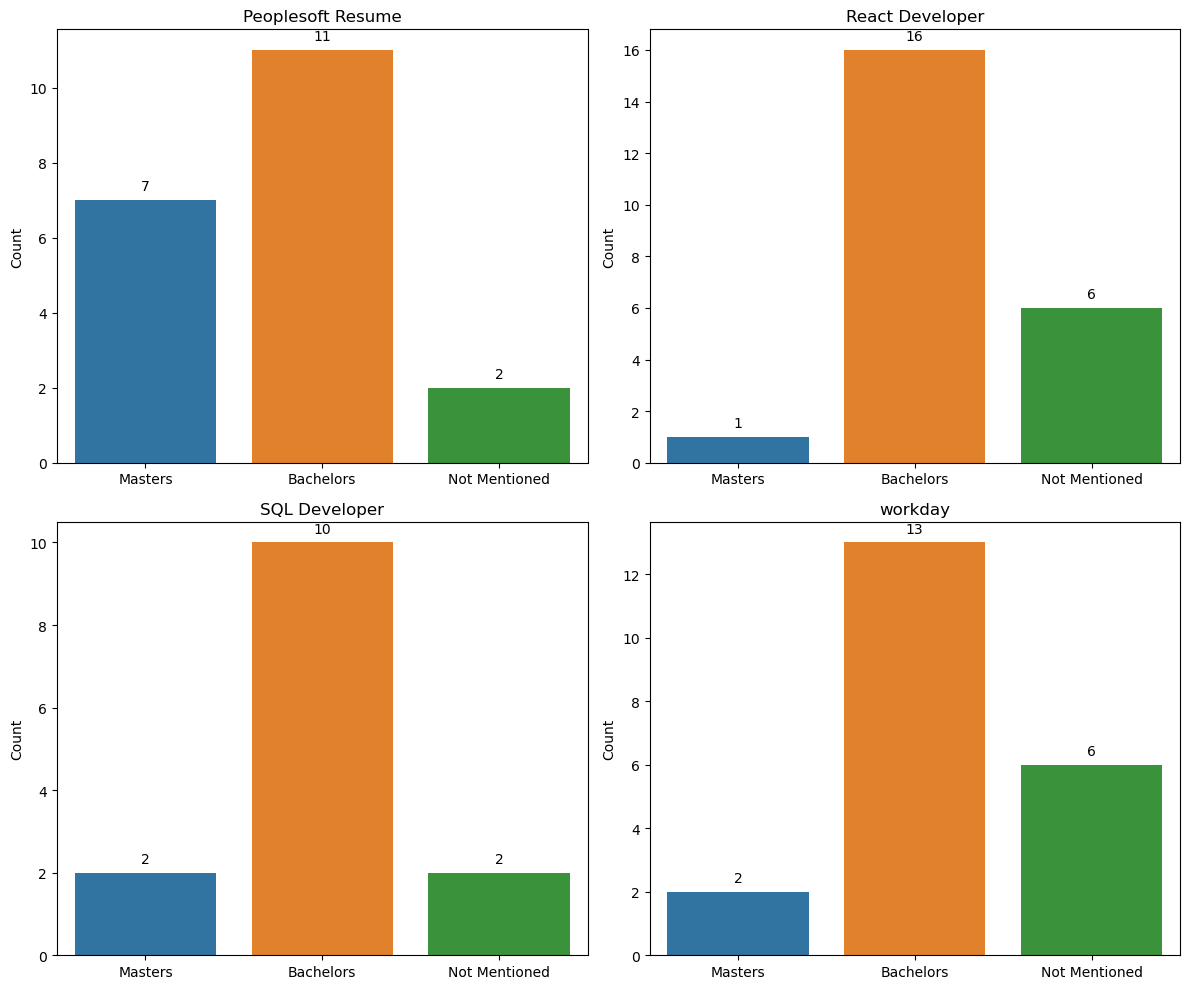

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, label in enumerate(df["label"].unique()): 
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.countplot(x=df[df["label"] == label]["qualification"], ax=ax,order=["Masters", "Bachelors", "Not Mentioned"])
    
    ax.set_title(label)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    
    for patch in ax.patches:
        ax.annotate(format(patch.get_height(), '.0f'), 
                    (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()

- People soft is the field where masters is also needed 

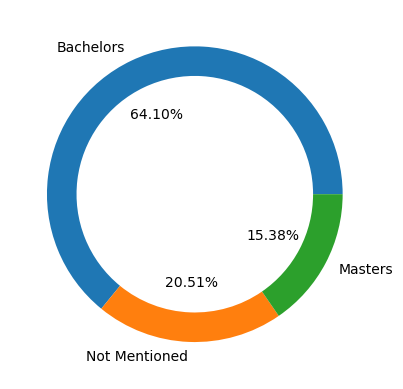

In [34]:
plt.pie(df["qualification"].value_counts(), autopct="%.2f%%", labels=df["qualification"].value_counts().index,
       wedgeprops={'width':0.2,});

around 20% people have not mentioned there education

## experience and degree relation

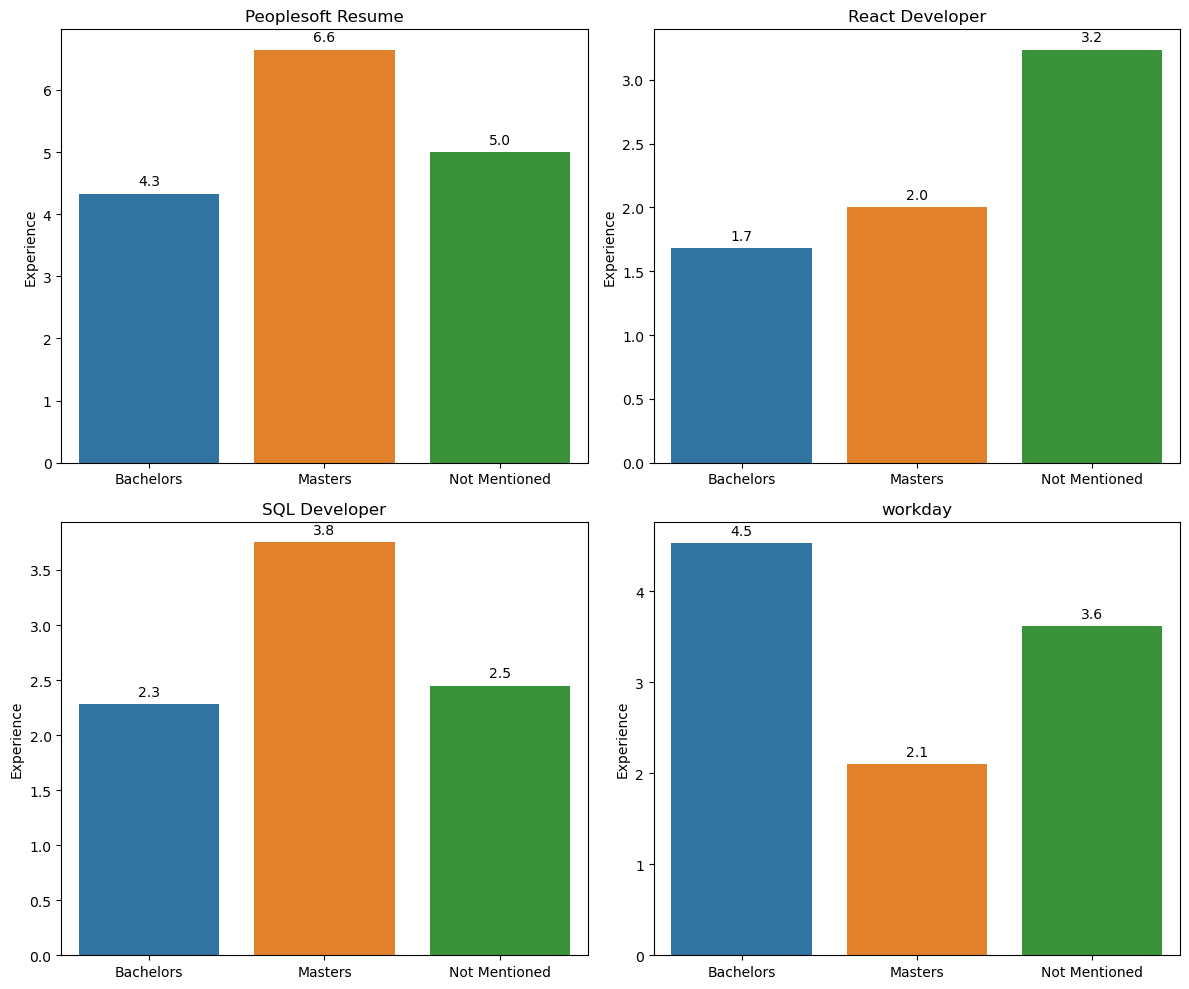

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, j in enumerate(df["label"].unique()):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    data = df[df["label"] == j]

    sns.barplot(x=data["qualification"], y=data["exp"], ax=ax, errorbar=('ci', False), 
                order=["Bachelors", "Masters", "Not Mentioned"])
    ax.set_title(j)
    ax.set_xlabel('')
    ax.set_ylabel('Experience')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()


even though the number of people having masters degree is less but have More experience


## qualification and skills relation

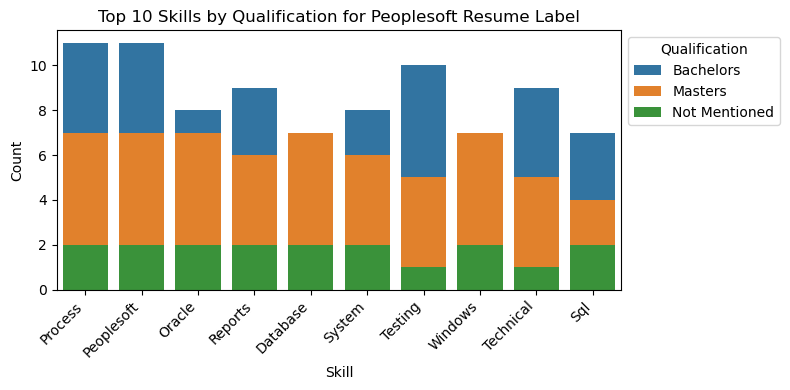

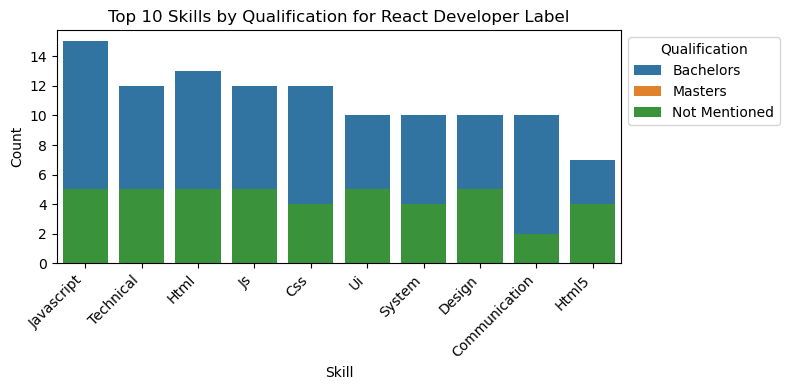

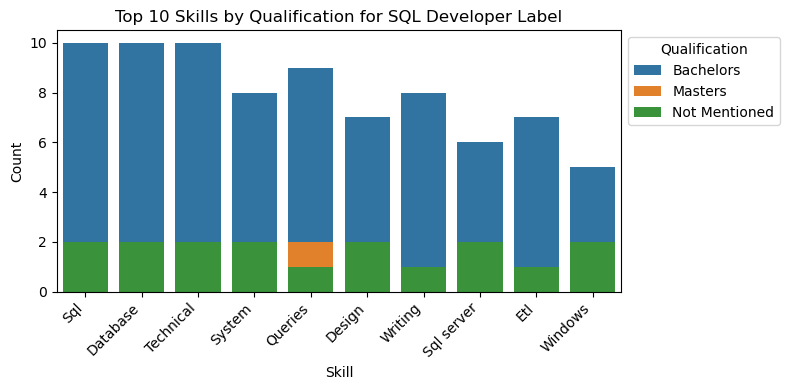

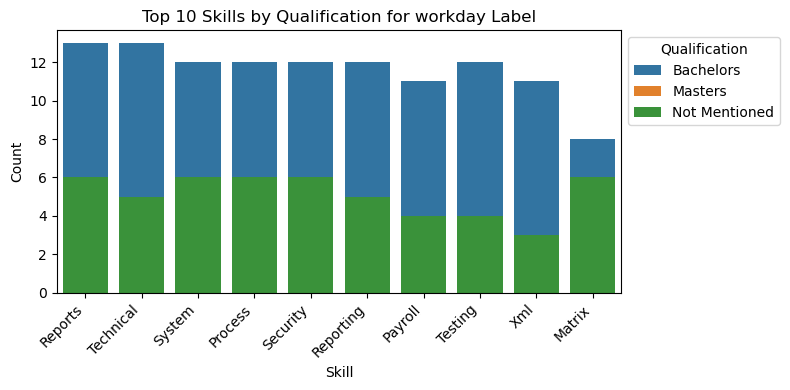

In [36]:

labels = df['label'].unique()

for label in labels:
    label_df = df[df['label'] == label]
    
    all_skills = []
    all_qualifications = []
    for skills_list, qualification in zip(label_df['skills'], label_df['qualification']):
        all_skills.extend(skills_list)
        all_qualifications.extend([qualification] * len(skills_list))
    
    data = pd.DataFrame({'Skill': all_skills, 'Qualification': all_qualifications})
    
    skill_counts = data['Skill'].value_counts().nlargest(10)
    top_skills = skill_counts.index
    
    top_data = data[data['Skill'].isin(top_skills)]
    
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x='Skill', hue='Qualification', data=top_data, order=top_skills, hue_order=["Bachelors", "Masters", "Not Mentioned"], dodge=False)
    plt.title(f'Top 10 Skills by Qualification for {label} Label')
    plt.xlabel('Skill')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  
    plt.legend(title='Qualification', loc='upper left', bbox_to_anchor=(1,1))
    

    plt.tight_layout()
    plt.show()


- for workday , SQL developer, and react developer top 10 skills are covered with people having bachelors degree
- people soft top 10 skills require people having masters degree 

In [37]:
nlp = spacy.load("en_core_web_sm")


def extract_locations(document_text):
    doc = nlp(document_text)
    
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    
    return locations


extract_locations(df["content"].iloc[0])


['Github',
 'Weblogic',
 'Jenkins',
 'CA',
 'Weblogic',
 'Tuxedo',
 'App',
 'Troubleshooting']

In [38]:
from spacy import displacy 

doc = nlp(df["content"].iloc[0])
displacy.render(doc, style="ent")

In [39]:
df[['exp']]

,exp
0,0.00
1,7.00
2,4.00
3,6.00
4,4.11
5,6.80
6,10.00
7,4.20
8,7.00
9,6.40


In [40]:
df.to_csv("final_df.csv")